### Importing Necessory Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Calling of data_set and understanding it

In [2]:
df=pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
for i in df:
    print(i,":-")
    print(df[i].unique())
    
    print('\n\n')

age :-
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]



job :-
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']



marital :-
['married' 'single' 'divorced']



education :-
['primary' 'secondary' 'tertiary' 'unknown']



default :-
['no' 'yes']



balance :-
[ 1787  4789  1350 ...  -333 -3313  1137]



housing :-
['no' 'yes']



loan :-
['no' 'yes']



contact :-
['cellular' 'unknown' 'telephone']



day :-
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]



month :-
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']



duration :-
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182

### Cleaning Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Label Encoding

In [7]:
encoding_lst=['job','marital','education','default','housing','loan','contact','month','poutcome']

In [8]:
le=LabelEncoder()
for i in encoding_lst:
    df[i]=le.fit_transform(df[i])
    print("Classes:", le.classes_)

    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    # print("")
    print("Mapping:", mapping)
    print("")

Classes: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Mapping: {'admin.': np.int64(0), 'blue-collar': np.int64(1), 'entrepreneur': np.int64(2), 'housemaid': np.int64(3), 'management': np.int64(4), 'retired': np.int64(5), 'self-employed': np.int64(6), 'services': np.int64(7), 'student': np.int64(8), 'technician': np.int64(9), 'unemployed': np.int64(10), 'unknown': np.int64(11)}

Classes: ['divorced' 'married' 'single']
Mapping: {'divorced': np.int64(0), 'married': np.int64(1), 'single': np.int64(2)}

Classes: ['primary' 'secondary' 'tertiary' 'unknown']
Mapping: {'primary': np.int64(0), 'secondary': np.int64(1), 'tertiary': np.int64(2), 'unknown': np.int64(3)}

Classes: ['no' 'yes']
Mapping: {'no': np.int64(0), 'yes': np.int64(1)}

Classes: ['no' 'yes']
Mapping: {'no': np.int64(0), 'yes': np.int64(1)}

Classes: ['no' 'yes']
Mapping: {'no': np.int64(0), 'yes': np.int64(1)}

Classes: ['

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,no
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,no
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,no
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,no
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,no
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,no
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,no
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,no


### Splitting in to train and test data 

In [10]:
features=df.drop('y',axis=1)
label=df['y']

In [11]:
f_train,f_test,l_train,l_test=train_test_split(features,label,test_size=0.3)

In [12]:
# print(len(f_train))
# print(len(l_train))
# print(len(f_test))
# print(len(l_test))

### Model Traing

In [13]:
dt=DecisionTreeClassifier()
dt.fit(f_train,l_train)
prediction=dt.predict(f_test)
accuracy=accuracy_score(prediction,l_test)
accuracy

0.8585114222549742

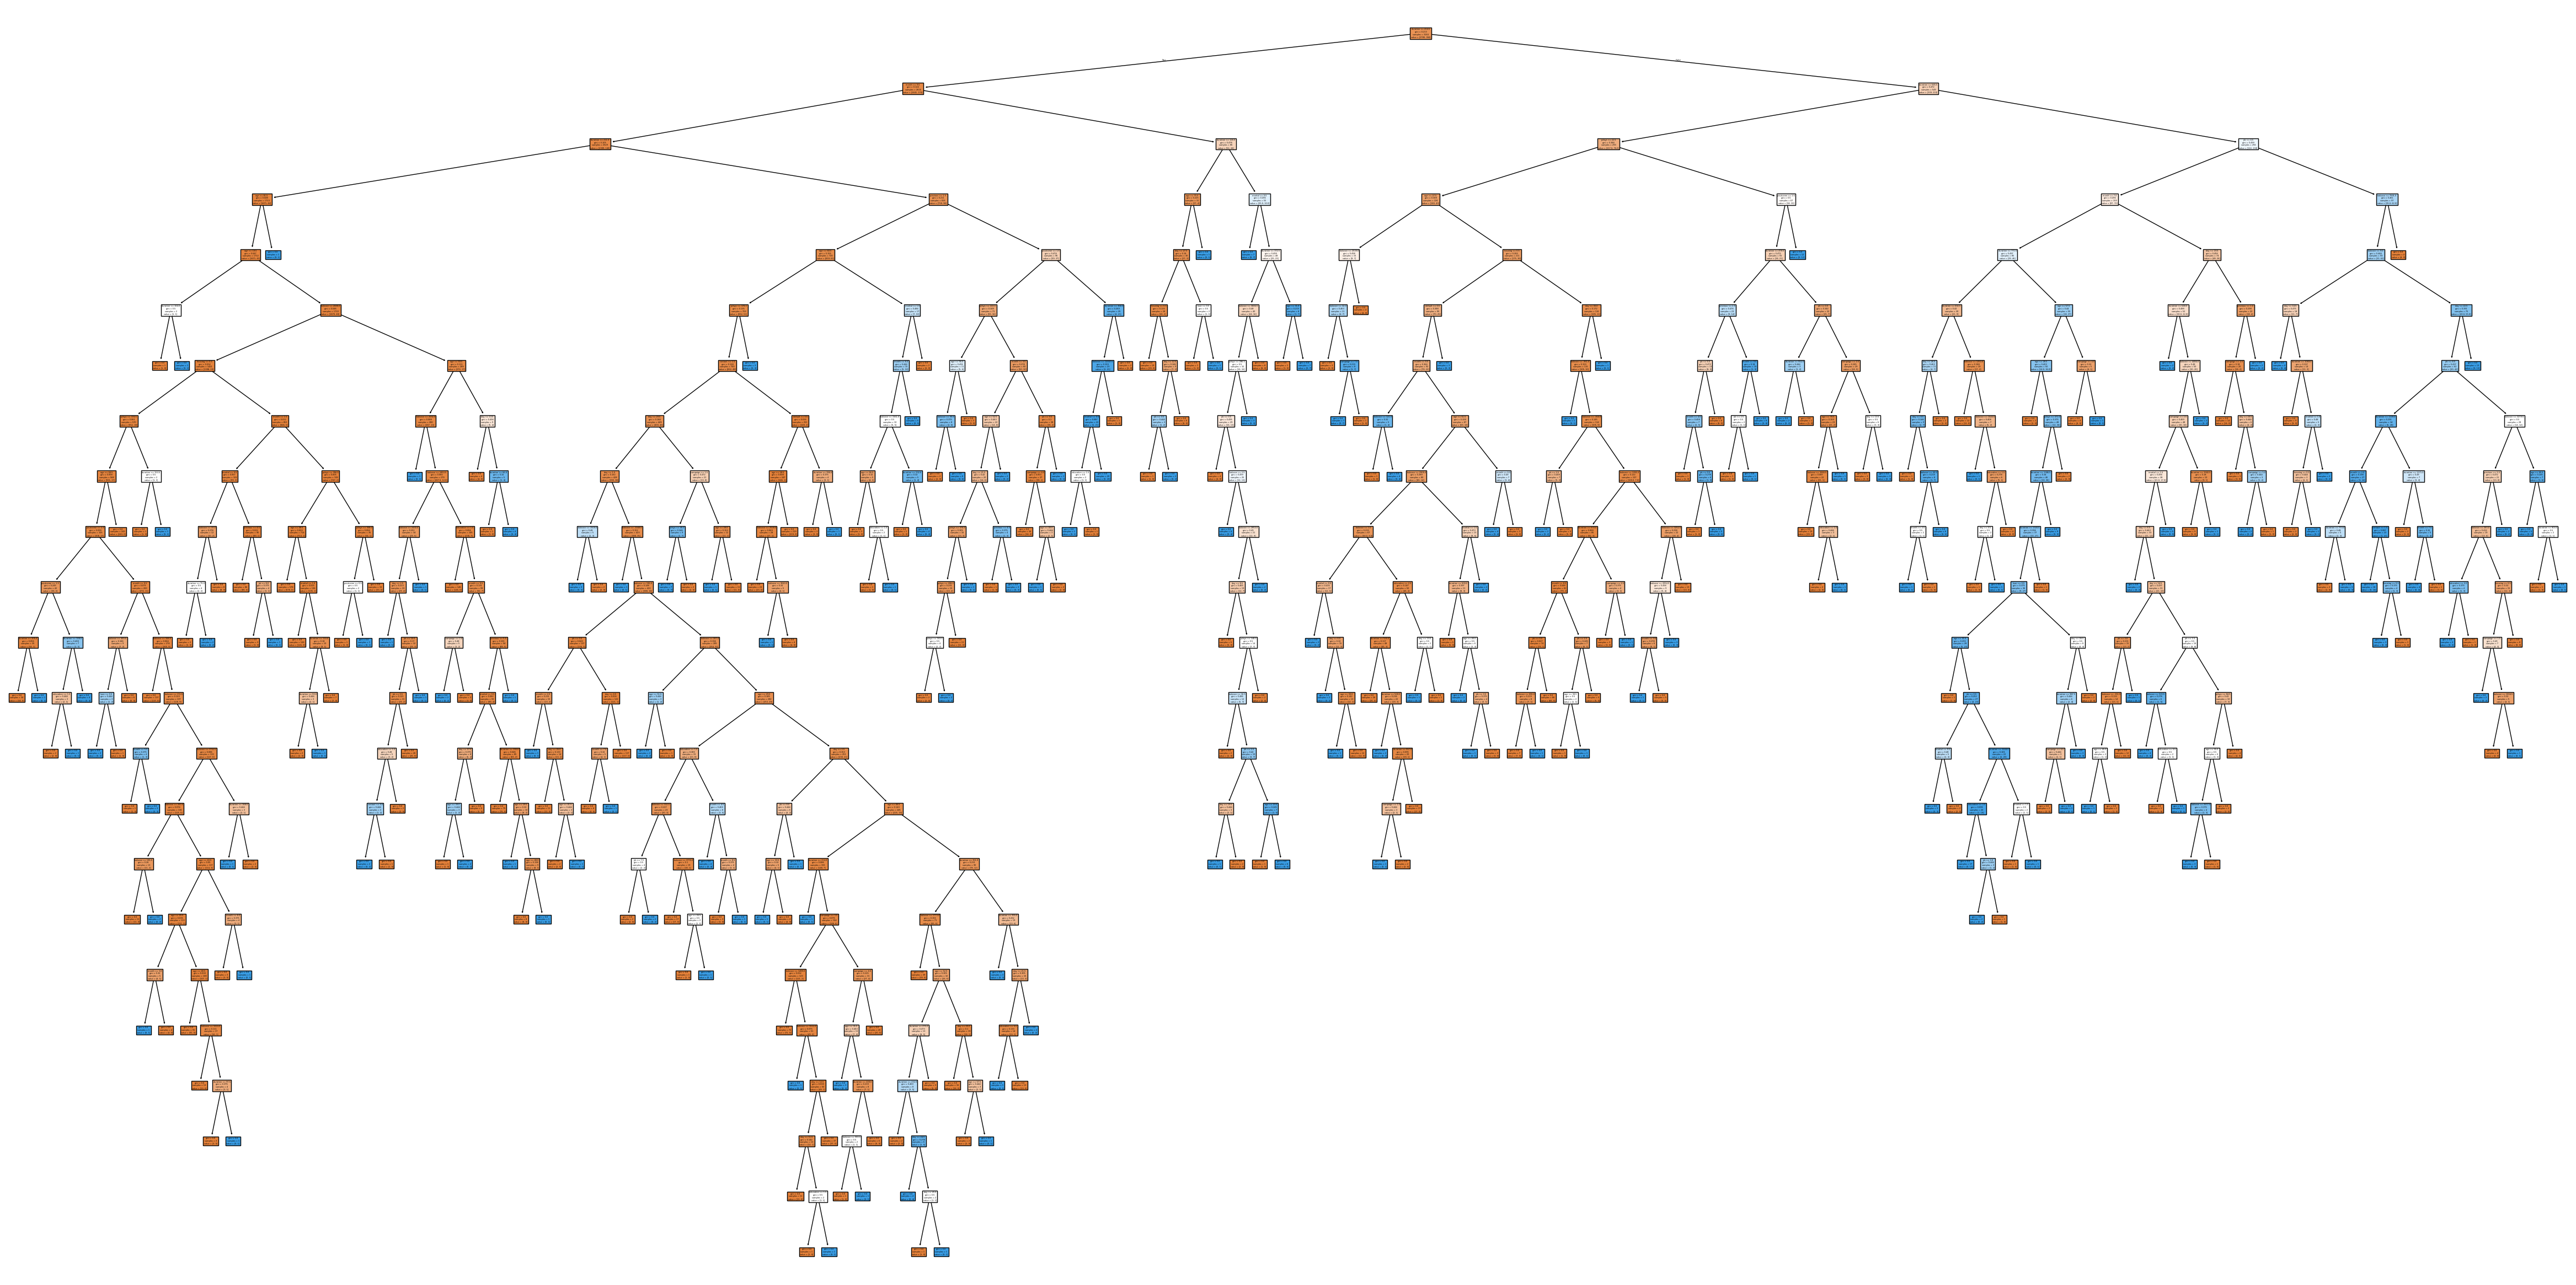

In [14]:
plt.figure(figsize=(60,30))
plot_tree(dt,filled=True,feature_names=features.columns)
plt.savefig("bank_tree.png")
plt.show()

### Epoch

In [15]:
accuracy_list=[]
for i in range(100):
    f_train,f_test,l_train,l_test=train_test_split(features,label,test_size=0.3)
    dt=DecisionTreeClassifier()
    dt.fit(f_train,l_train)
    prediction=dt.predict(f_test)
    accuracy=accuracy_score(prediction,l_test)
    accuracy_list.append(accuracy)  

print(f"Accuracy of the model is :- {np.mean(accuracy_list)*100}%")

Accuracy of the model is :- 86.4060427413412%


### Test

In [16]:
f_test.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
396,34,0,1,1,0,613,1,0,0,4,6,80,1,-1,0,3
4011,41,9,1,1,0,1602,1,0,0,2,6,142,1,-1,0,3
4127,56,9,2,2,0,917,0,0,2,9,6,306,1,-1,0,3
1231,37,7,0,1,0,490,1,0,0,2,3,73,1,-1,0,3
2946,45,0,1,1,0,-388,1,0,0,14,5,175,2,-1,0,3


In [17]:
l_test.tail()

396     no
4011    no
4127    no
1231    no
2946    no
Name: y, dtype: object

In [18]:
data_no = [[50,9,1,1,0,841,1,0,2,29,8,54,2,-1,0,3]]           #no
data_yes = [[47,7,2,3,0,1784,0,0,0,19,10,385,2,-1,0,3]]             #yes
df_no = pd.DataFrame(data_no, columns=features.columns)
df_yes = pd.DataFrame(data_yes, columns=features.columns)

# predict
ans = dt.predict(df_no)
print(ans[0])

ans = dt.predict(df_yes)
print(ans[0])

no
yes


### Model save

In [19]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(dt, f)
